## 1. Imports

In [1]:
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import decode_predictions

Using TensorFlow backend.


## 2. Cargar modelo

In [2]:
model = VGG16(weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

## 3. Evaluar modelo

In [3]:
img_path = 'elefante.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
img


FileNotFoundError: ignored

In [0]:
prediccion = model.predict(x)
label = decode_predictions(prediccion)
label = label[0][0]
print('Predicción')
print('%s (%.2f%%)' % (label[1], label[2]*100))

## 4. Tranfer Learning

Se realiza $\textit{transfer learning}$ luego de la capa "block5_pool (MaxPooling2D)".

In [0]:
model1 = VGG16(weights='imagenet', include_top=True, input_shape = (224, 224, 3))

In [4]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping


# fijar pesos
for layer in model1.layers[0:22]:
    layer.trainable = False
    
# agregando capas

x = model1.layers[21].output
predictions = Dense(10, activation="softmax")(x)


modelo_final = Model(input = model1.input, output = predictions)
modelo_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999), metrics=["accuracy"])

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [6]:
modelo_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
import cv2


from keras.datasets import cifar10
from keras import backend as K
from keras.utils import np_utils

nb_train_samples = 30000 
nb_valid_samples = 5000 
num_classes = 10 


def load_cifar10_data(img_rows, img_cols):

    # Se cargan los sets de cifar10 para entrenamiento y validacion.
    (x_train, y_train_norm), (x_test, y_test_norm) = cifar10.load_data()

    # Reescalado de imagenes
    if K.image_dim_ordering() == 'th':
        x_train = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in x_train[:nb_train_samples,:,:,:]])
        x_test = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in x_test[:nb_valid_samples,:,:,:]])
    else:
        x_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in x_train[:nb_train_samples,:,:,:]])
        x_test = np.array([cv2.resize(img, (img_rows,img_cols)) for img in x_test[:nb_valid_samples,:,:,:]])

    y_train = y_train_norm[:nb_train_samples]
    y_test = y_test_norm[:nb_valid_samples]

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_cifar10_data(224, 224)




In [0]:
# cantidad de elementos por clase
cantidad_clase = np.array([0]*10)
for i in range(0,len(y_train)):
  clase = y_train[i]
  cantidad_clase[clase] = cantidad_clase[clase] + 1
  
clases = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']




    
  



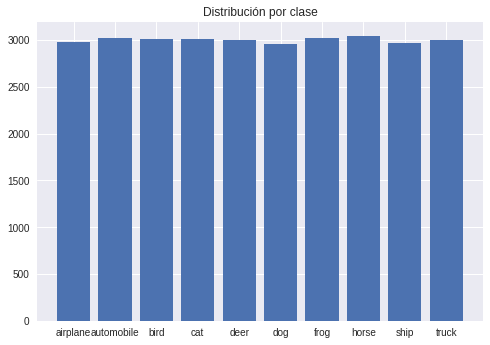

In [22]:
    # this is for plotting purpose
    import matplotlib.pyplot as plt
    plt.bar(clases, cantidad_clase)
    plt.title('Distribución por clase en entrenamiento')
    plt.show()
   

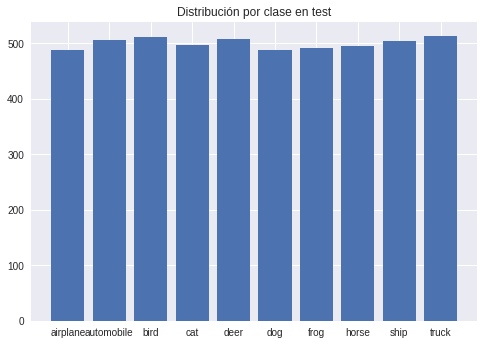

In [23]:
cantidad_clase = np.array([0]*10)
for i in range(0,len(y_test)):
  clase = y_test[i]
  cantidad_clase[clase] = cantidad_clase[clase] + 1
  
plt.bar(clases, cantidad_clase)
plt.title('Distribución por clase en test')
plt.show()
   
   

In [0]:
# transformar a variables categoricas

y_train_cat = np_utils.to_categorical(y_train[:nb_train_samples], num_classes)
y_test_cat = np_utils.to_categorical(y_test[:nb_valid_samples], num_classes)

In [29]:
callbacks = [checkpoint, early]
training = modelo_final.fit(x=x_train, y=y_train_cat, batch_size=50, epochs=20, verbose=1, callbacks=callbacks, validation_split=0.0, validation_data=(x_test,y_test_cat), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Train on 30000 samples, validate on 5000 samples
Epoch 1/20
30000/30000 [==============================] - 343s 11ms/step - loss: 0.8530 - acc: 0.7169 - val_loss: 0.7350 - val_acc: 0.7590

Epoch 00001: val_acc improved from -inf to 0.75900, saving model to vgg16_1.h5
Epoch 2/20
30000/30000 [==============================] - 343s 11ms/step - loss: 0.6074 - acc: 0.7926 - val_loss: 0.6675 - val_acc: 0.7826

Epoch 00002: val_acc improved from 0.75900 to 0.78260, saving model to vgg16_1.h5
Epoch 3/20
30000/30000 [==============================] - 343s 11ms/step - loss: 0.5167 - acc: 0.8207 - val_loss: 0.7987 - val_acc: 0.7534

Epoch 00003: val_acc did not improve from 0.78260
Epoch 4/20
30000/30000 [==============================] - 343s 11ms/step - loss: 0.4510 - acc: 0.8411 - val_loss: 0.7321 - val_acc: 0.7746

Epoch 00004: val_acc did not improve from 0.78260
Epoch 5/20
30000/30000 [==============================] - 343s 11ms/step - loss: 0.4011 - acc: 0.8588 - val_loss: 0.7050 - val_acc

# 5. Evaluar modelo

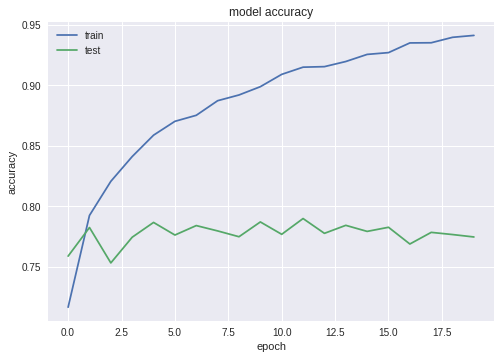

In [30]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

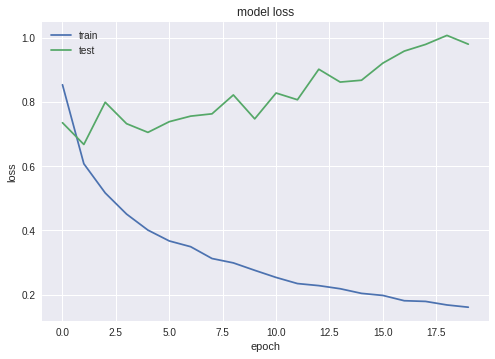

In [31]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




Confusion matrix, without normalization
[[341   6  37   3  17   4   2  15  52  11]
 [  8 428   3   5   0   2   4   2  19  34]
 [  8   0 404  18  31  21  12   9   7   2]
 [  0   1  34 299  21  84  19  24  11   4]
 [  0   0  32  12 401  21  17  19   5   0]
 [  2   0  27  81  18 331  11  15   3   0]
 [  2   3  53  17  29   8 368   7   3   1]
 [  4   0  12  13  32  36   4 383   8   3]
 [  8   4   4   2   3   1   0   2 476   4]
 [  6  31   0   3   3   2   2   4  19 443]]
Normalized confusion matrix
[[0.7  0.01 0.08 0.01 0.03 0.01 0.   0.03 0.11 0.02]
 [0.02 0.85 0.01 0.01 0.   0.   0.01 0.   0.04 0.07]
 [0.02 0.   0.79 0.04 0.06 0.04 0.02 0.02 0.01 0.  ]
 [0.   0.   0.07 0.6  0.04 0.17 0.04 0.05 0.02 0.01]
 [0.   0.   0.06 0.02 0.79 0.04 0.03 0.04 0.01 0.  ]
 [0.   0.   0.06 0.17 0.04 0.68 0.02 0.03 0.01 0.  ]
 [0.   0.01 0.11 0.03 0.06 0.02 0.75 0.01 0.01 0.  ]
 [0.01 0.   0.02 0.03 0.06 0.07 0.01 0.77 0.02 0.01]
 [0.02 0.01 0.01 0.   0.01 0.   0.   0.   0.94 0.01]
 [0.01 0.06 0.   0.01 0.

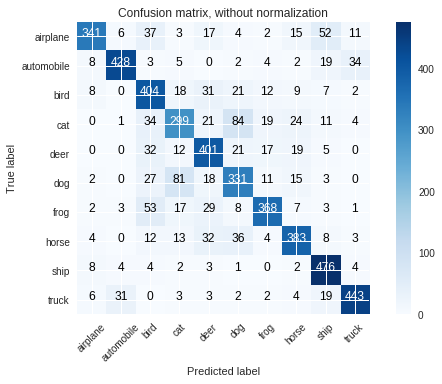

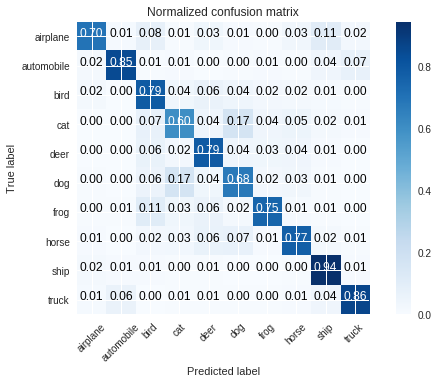

In [34]:

Y_pred = modelo_final.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=clases))

             precision    recall  f1-score   support

   airplane       0.90      0.70      0.79       488
 automobile       0.90      0.85      0.88       505
       bird       0.67      0.79      0.72       512
        cat       0.66      0.60      0.63       497
       deer       0.72      0.79      0.76       507
        dog       0.65      0.68      0.66       488
       frog       0.84      0.75      0.79       491
      horse       0.80      0.77      0.79       495
       ship       0.79      0.94      0.86       504
      truck       0.88      0.86      0.87       513

avg / total       0.78      0.77      0.77      5000



In [0]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)



In [42]:
scores = perf_measure(y_test, y_pred)

print('TP',scores[0])
print('FP',scores[1])
print('TN',scores[2])
print('FN',scores[3])

TP 428
FP 45
TN 341
FN 38
